## Analysing Spotify 2023 Data

Step 1: Start by importing the required modules

In [1]:
import pandas as pd
import re 

Step 2: Read the provided csv and load it into DataFrame in a variable called spotify

In [6]:
spotify = pd.read_csv("data/spotify-2023-dirt.csv")
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125.0,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92.0,C#,Major,71,61,74,7,0,10,4
2,vampire,OLIVIA RODRIGO,1,2023,6,30,1397,113,140003974,94,...,138.0,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,TAYLOR SWIFT,1,2019,8,23,7858,100,800840817,116,...,170.0,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144.0,A,Minor,65,23,80,14,63,11,6


### Objectives

The objective of this practical excercise is to produce a reliable dataset for a posterior analysis. We have received data from Spotify. This data includes information about th most listened tracks in 2023. We want to explore the data and visualize the possible relationships between artists, the style of music, and the amount of streams that they have had.

However, in order to achieve this and ensure that our conclusions are meaningful, we must ensure that the data analysed is clean and without errors, at least, to the maximumn extent of our ability.

## Part 1: Artist Names

We want to obtain the list of all the artists that are included in the top 2023 songs list to be able to do some analytics on those later on.

Step 3: Output the different artists names

In [7]:
artists = spotify["artist(s)_name"].unique()
artists.sort()
artists


array(['(G)I-DLE', '21 Savage, Gunna', '24KGOLDN, IANN DIOR', '50 Cent',
       'A$AP Rocky, Metro Boomin, Roisee',
       'ADASSA, MAURO CASTILLO, STEPHANIE BEATRIZ, ENCANTO - CAST, RHENZY FELIZ, DIANE GUERRERO, CAROLINA GAITAN',
       'Abhijay Sharma, Riar Saab', 'Adele', 'Aerosmith', 'Agust D',
       'Aitana, zzoilo', 'Ak4:20, Cris Mj, Pailita', 'Alec Benjamin',
       'Alvaro Diaz, Rauw Alejandro', 'Ana Castela, AgroPlay',
       'Andy Williams', 'Anggi Marito', 'Anitta', 'Anitta, Tini, Becky G',
       'AnnenMayKantereit, Giant Rooks', 'Anuel Aa, Jhay Cortez',
       'Anuel Aa, Myke Towers, Jhay Cortez', 'Arcangel, Bad Bunny',
       'Arcangel, Bizarrap',
       'Arcangel, De La Ghetto, Justin Quiles, Lenny Tavrez, Sech, Dalex, Dimelo Flow, Rich Music',
       'Arctic Monkeys', 'Ariana Grande', 'Ariana Grande, The Weekdn',
       'Ariana Grande, The Weeknd', 'Arijit Singh, Sachin-Jigar',
       'Arijit Singh, Sachin-Jigar, Amitabha Bhattacharya',
       'Arijit Singh, Vishal Dad

Step 4: Split songs that have multiple artists into many different rows (as much as the number of artists)

In [8]:
pattern = re.compile(r"[\s,]*([^,]+)")
splitted_artists = []
for _,row in spotify.iterrows():
    artists = row["artist(s)_name"]
    for match in re.finditer(pattern, artists):
        newRow = row.copy()
        newRow["artist"] = match.group(1)
        splitted_artists.append(newRow)

spotify_splitted = pd.DataFrame(splitted_artists)
spotify_splitted


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Latto
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Jung Kook
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,Myke Towers
2,vampire,OLIVIA RODRIGO,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,OLIVIA RODRIGO
3,Cruel Summer,TAYLOR SWIFT,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,TAYLOR SWIFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,Paulo Londra
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,Feid
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,Sech
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,Jhayco


Step 5: Ensure that artists names are unique and without errors (For example, there are entries of Taylor Swift both in Caps and not caps). Ignore codification errors for the time being (accents)

In [9]:
unique_artists = spotify_splitted.artist.sort_values().unique()
print(unique_artists)
print(len(unique_artists))

[' ' '(G)I-DLE' '070 Shake' '21 Savage' '24KGOLDN' '2Pac' '347aidan'
 '4*TOWN (From Disney and Pixars Turning Red)' '50 Cent'
 'A Boogie Wit da Hoodie' 'A$AP Rocky' 'ACRAZE' 'ADASSA' 'AITCH'
 'ANDERSON .PAAK' 'AP Dhillon' 'ARIZONATEARS' "AX'EL" 'Abhijay Sharma'
 'Abhir Hathi' 'Adele' 'Aerosmith' 'AgroPlay' 'Agust D' 'Aitana' 'Ak4:20'
 'Alec Benjamin' 'Alejo' 'Alesso' 'Ali Sethi' 'Alicia Keys'
 'Altamash Faridi' 'Alvaro Diaz' 'Amaarae' 'Amanda Reifer'
 'Amitabh Bhattacharya' 'Amitabha Bhattacharya' 'Ana Castela'
 'Anderson .Paak' 'Andy Williams' 'Angela Aguilar' 'Anggi Marito' 'Anitta'
 'Anne-Marie' 'AnnenMayKantereit' 'Anuel Aa' 'Aqua' 'Arcane' 'Arcangel'
 'Arctic Monkeys' 'Ariana Grande' 'Arijit Singh' 'Armani White' 'Ava'
 'Aventura' 'Avicii' 'Ayparia' 'B' 'B. Swanson Quartet' 'BAD BUNNY'
 'BEACH WEATHER' 'BEAM' 'BECKY G' 'BENNY BLANCO' 'BIG ONE' 'BIGBANG'
 'BILLIE EILISH' 'BL' 'BLACKPINK' 'BLESSD' 'BRUNO MARS' 'BTS' 'BURL IVES'
 'BYOR' 'Baby Keem' 'Baby Rasta' 'Baby Tate' 'Bad B' 'B

We can already see that there are some artists that are capitalized and others that are not. Let's convert everything to lower case and check if we remove duplicates

In [10]:
spotify_artists_lowercase = spotify_splitted.copy()
spotify_artists_lowercase.artist = spotify_artists_lowercase.artist.apply(lambda artist:artist.lower())
unique_artists_lowercase = spotify_splitted.artist.apply(lambda artist:artist.lower()).sort_values().unique()
print(unique_artists_lowercase)
print(len(unique_artists_lowercase))

[' ' '(g)i-dle' '070 shake' '21 savage' '24kgoldn' '2pac' '347aidan'
 '4*town (from disney and pixars turning red)' '50 cent'
 'a boogie wit da hoodie' 'a$ap rocky' 'a-ha' 'abhijay sharma'
 'abhir hathi' 'acraze' 'adassa' 'adele' 'aerosmith' 'agroplay' 'agust d'
 'aitana' 'aitch' 'ak4:20' 'alec benjamin' 'alejo' 'alesso' 'ali sethi'
 'alicia keys' 'altamash faridi' 'alvaro diaz' 'amaarae' 'amanda reifer'
 'amitabh bhattacharya' 'amitabha bhattacharya' 'ana castela'
 'anderson .paak' 'andy williams' 'angela aguilar' 'anggi marito' 'anitta'
 'anne-marie' 'annenmaykantereit' 'anuel aa' 'ap dhillon' 'aqua' 'arcane'
 'arcangel' 'arctic monkeys' 'ariana grande' 'arijit singh' 'arizonatears'
 'armani white' 'ava' 'aventura' 'avicii' "ax'el" 'ayparia' 'b'
 'b. swanson quartet' 'baby keem' 'baby rasta' 'baby tate' 'bad b'
 'bad bunny' 'bad bunyn' 'band aid' 'be' 'beach house' 'beach weather'
 'beam' 'bebe rexha' 'becky g' 'becky hill' 'bellakath' 'benny blanco'
 'benson boone' 'beth gibbons' 'b

We have removed 65 duplicates by transforming everything to lower case, but there are still things that look odd like `bad bunny` and `bad bunyn`. Let's analyze this further by looking at the distance between strings.

In [11]:
from Levenshtein import distance as string_distance
import matplotlib.pyplot as plt

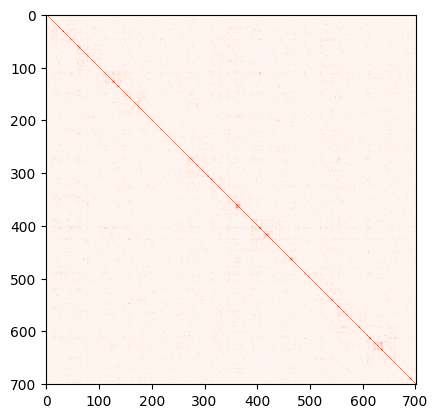

In [12]:
artist_name_heatmap = []
artist_name_distance = {}
max_word_change_ratio = .8 # we will clip all changes that are higher than this value
for artist in unique_artists_lowercase:
    distances = [min(string_distance(artist.lower(), artist_iter.lower())/len(artist),max_word_change_ratio) for artist_iter in unique_artists_lowercase]
    artist_name_heatmap.append(distances)
    artist_name_distance[artist] = distances

fig, ax = plt.subplots()
ax.imshow(artist_name_heatmap, cmap="Reds_r", vmin=0, vmax=max_word_change_ratio)

We can see some heat points outside of the diagonal, which means there are strings that are quite close to each other, let's analyze which ones they are.

In [13]:
name_distance_df = pd.DataFrame(artist_name_distance, index=list(artist_name_distance.keys()))

In [14]:
# Let's print the artists that have another artist which normalized distance is closer than the threshold
threshold = 0.3

# Find similar artists for each artist
similar_artists = {}
for artist in name_distance_df.columns:
    similar = name_distance_df[name_distance_df[artist] < threshold].index.tolist()
    similar.remove(artist)  # Remove the artist itself from the list
    similar_artists[artist] = similar

# Print similar artists for each artist
for artist, similar_list in similar_artists.items():
    if similar_list:
        print(f"Similar artists to {artist}: {', '.join(similar_list)}")

Similar artists to amitabh bhattacharya: amitabha bhattacharya
Similar artists to amitabha bhattacharya: amitabh bhattacharya
Similar artists to arcangel: arcane
Similar artists to bad bunny: bad bunyn
Similar artists to bad bunyn: bad bunny
Similar artists to dean lewis: ryan lewis
Similar artists to jain: jin
Similar artists to libianca: bianca
Similar artists to marlia mendo: marlia mendona
Similar artists to marlia mendona: marlia mendo
Similar artists to mc menor hr: mc menor sg
Similar artists to mc menor sg: mc menor hr
Similar artists to mnek: mne
Similar artists to ryan lewis: dean lewis
Similar artists to taylor swift: taylor switf
Similar artists to taylor switf: taylor swift
Similar artists to the killers: the walters
Similar artists to the walters: the killers
Similar artists to the weekdn: the weeknd
Similar artists to the weeknd: the weekdn


Let's fix those.

In [15]:
# First apply lower case
spotify_artists_corrected = spotify_artists_lowercase.copy()
spotify_artists_corrected.loc[spotify_artists_corrected.artist == "bad bunyn", "artist"] = "bad bunny"
spotify_artists_corrected.loc[spotify_artists_corrected.artist.isin(["marlia mendo", "marlia mendona"]), "artist"] = "marilia mendonca"
spotify_artists_corrected.loc[spotify_artists_corrected.artist == "taylor switf", "artist"] = "taylor swift"
spotify_artists_corrected.loc[spotify_artists_corrected.artist == "the weekdn", "artist"] = "the weeknd"


In [16]:
unique_corrected_artists_lowercase = spotify_artists_corrected.artist.sort_values().unique()
print(unique_corrected_artists_lowercase)
print(len(unique_corrected_artists_lowercase))

[' ' '(g)i-dle' '070 shake' '21 savage' '24kgoldn' '2pac' '347aidan'
 '4*town (from disney and pixars turning red)' '50 cent'
 'a boogie wit da hoodie' 'a$ap rocky' 'a-ha' 'abhijay sharma'
 'abhir hathi' 'acraze' 'adassa' 'adele' 'aerosmith' 'agroplay' 'agust d'
 'aitana' 'aitch' 'ak4:20' 'alec benjamin' 'alejo' 'alesso' 'ali sethi'
 'alicia keys' 'altamash faridi' 'alvaro diaz' 'amaarae' 'amanda reifer'
 'amitabh bhattacharya' 'amitabha bhattacharya' 'ana castela'
 'anderson .paak' 'andy williams' 'angela aguilar' 'anggi marito' 'anitta'
 'anne-marie' 'annenmaykantereit' 'anuel aa' 'ap dhillon' 'aqua' 'arcane'
 'arcangel' 'arctic monkeys' 'ariana grande' 'arijit singh' 'arizonatears'
 'armani white' 'ava' 'aventura' 'avicii' "ax'el" 'ayparia' 'b'
 'b. swanson quartet' 'baby keem' 'baby rasta' 'baby tate' 'bad b'
 'bad bunny' 'band aid' 'be' 'beach house' 'beach weather' 'beam'
 'bebe rexha' 'becky g' 'becky hill' 'bellakath' 'benny blanco'
 'benson boone' 'beth gibbons' 'beyonc' 'bian

Step 6: Calculate the average streams per artist

In [17]:
spotify_artists_corrected["streams"] = pd.to_numeric(spotify_artists_corrected["streams"], errors="coerce") 
spotify_artists_corrected[["artist", "streams"]].groupby("artist").mean().sort_values("streams", ascending=False)

,streams
artist,
tones and i,2.864792e+09
kyla,2.713922e+09
glass animals,2.557976e+09
the chainsmokers,2.397652e+09
queen,2.197011e+09
...,...
beam,3.276169e+07
dj 900,1.195664e+07
sog,1.159939e+07


Step 7: Calculate the top 10 artists with more streams (and give also the number of streams)

In [14]:
spotify_artists_corrected[["artist", "streams"]].groupby("artist").sum().sort_values("streams", ascending=False).head(15)

,streams
artist,
the weeknd,2.392976e+10
bad bunny,2.381353e+10
ed sheeran,1.531659e+10
taylor swift,1.463038e+10
harry styles,1.160865e+10
eminem,1.019373e+10
dua lipa,9.980020e+09
justin bieber,8.243081e+09
drake,8.043031e+09


## Part 2: Analysing distributions of data and identifying outliers

We are now going to work with the columns of 

- bpm: Beats per minute, a measure of song tempo
- danceability_%: Percentage indicating how suitable the song is for dancing
- valence_%: Positivity of the song's musical content
- energy_%: Perceived energy level of the song
- acousticness_%: Amount of acoustic sound in the song
- instrumentalness_%: Amount of instrumental content in the song
- speechiness_%: Amount of spoken words in the song

This columns should be:

- Numerical
- Represent a percentage (except bpm)

Step 7: Study the columns in percentage format and remove data outside the desired range

In [15]:
COLUMN_TO_STUDY = "valence_%"

spotify_splitted[COLUMN_TO_STUDY].describe()

count    1482.000000
mean       53.187584
std        23.623851
min        -5.000000
25%        35.250000
50%        54.000000
75%        72.000000
max       120.000000
Name: valence_%, dtype: float64

<Axes: >

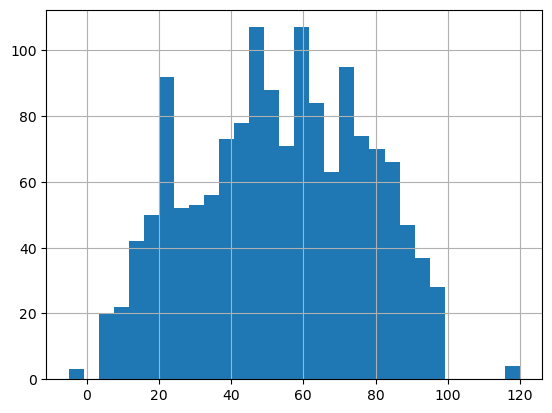

In [16]:
spotify_splitted[COLUMN_TO_STUDY].hist(bins=30)

We know percentages must be in the interval of 0-100. A negative percentage does not have a meaning here.

Hence, we will set those values to NaN. The reason for doing this, is that it will allow us to keep columns that are actually usefull when other columns aren ot. I.E, bpm might be invalid but valence_% might be not.

In [17]:
import numpy as np

for column in ['danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']:
    
    spotify_splitted.loc[(spotify_splitted[column] < 0) | (spotify_splitted[column] >100), column] = np.nan

Step 8: Study the normality of the variable bpm

In [18]:
COLUMN_TO_STUDY = "bpm"

In [19]:
from scipy.stats import anderson
data = spotify_splitted[COLUMN_TO_STUDY][spotify_splitted[COLUMN_TO_STUDY].notnull()]
stat = anderson(data, 'norm')
print(f"Anderson-Darling statistic for {COLUMN_TO_STUDY:<12s}: {stat.statistic:6.2f}")
print("Anderson-Darling significance levels: ", stat.significance_level)
print("Anderson-Darling critical values: ", stat.critical_values)


Anderson-Darling statistic for bpm         : 193.78
Anderson-Darling significance levels:  [15.  10.   5.   2.5  1. ]
Anderson-Darling critical values:  [0.574 0.654 0.785 0.916 1.089]


For a significance level of 1, the critical value of the Anderson test is 1.089. We got a value much greter than that, so we can discard our null hypothesis that the data follows a normal distribution.

Step 9: Make a boxplot of the bpm variable and use the IQR to remove remaining outliers

In [20]:
spotify_splitted.bpm.describe()

count    1482.000000
mean      128.137700
std        74.349473
min        65.000000
25%       100.000000
50%       120.000000
75%       140.000000
max       999.000000
Name: bpm, dtype: float64

<Axes: >

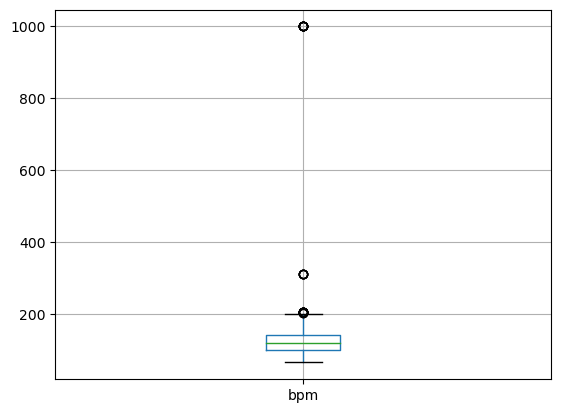

In [21]:
spotify_splitted.boxplot("bpm")

In [22]:
THRESHOLD_MULTIPLIER = 1.5

IQR = spotify_splitted.bpm.quantile(0.75) - spotify_splitted.bpm.quantile(0.25)
quantile_thresholds = [ spotify_splitted.bpm.quantile(0.25) -THRESHOLD_MULTIPLIER * IQR, spotify_splitted.bpm.quantile(0.75) + THRESHOLD_MULTIPLIER * IQR]
quantile_thresholds

[40.0, 200.0]

<Axes: >

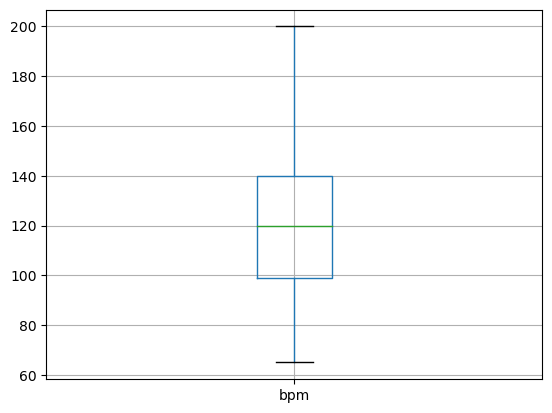

In [23]:
spotify_splitted.loc[(spotify_splitted.bpm < quantile_thresholds[0]) | (spotify_splitted.bpm > quantile_thresholds[1]), "bpm"] = np.nan
spotify_splitted.boxplot("bpm")